In [15]:
import pandas as pd # Inorder To load files and perform tasks
import numpy as np # for the linear algebra
import seaborn as sns  # for the data visualizations
import matplotlib.pyplot as plt # for the data visualizations
import sklearn 
import sklearn.preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV 

import statsmodels.api as sm
import sklearn 
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
import pickle

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [2]:
df= pd.read_csv("HR_comma_sep.csv")

In [3]:
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years    sales  salary  
0                          0    sales     low  
1                          0    sales  medium  
2                          0    sales  medium  
3                          0    sales     low  
4                          0    sales     low  
...                      ...      ...     ...  
14994                      0  support     low  
14995                      0  support     low  
14996                      0  support     low  
14997                      0  support     low  
14998                      0  support     low  

[14999 rows x 10 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [6]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [7]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0      7   
1                   6              0     1                      0      7   
2                   4              0     1                      0      7   
3                   5              0     1                      0      7   
4                   3              0     1                      0      7   

   salary  
0       1  
1       2  
2       2  
3       1  
4       1

In [8]:
corr = df.corr(method='pearson')
corr

satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   
sales                            0.003153         0.007772        0.009268   
salary                           0.011754         0.013965        0.009672   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours               1.000000            0.127755   
time_spend_company                 0.127755            1.000000   
Work_accident                     -0.010143            0.002120   
left                               0.071287            0.144822   
promotion_last_5years             -0.003544            0.067433   
sales                              0.003913           -0.018010   
salary                             0.007082           -0.003086   

                       Work_accident      left  promotion_last_5years  \
satisfaction_level          0.058697 -0.388375               0.025605   
last_evaluation            -0.007104  0.006567              -0.008684   
number_project             -0.004741  0.023787              -0.006064   
average_montly_hours       -0.010143  0.071287              -0.003544   
time_spend_company          0.002120  0.144822               0.067433   
Work_accident               1.000000 -0.154622               0.039245   
left                       -0.154622  1.000000              -0.061788   
promotion_last_5years       0.039245 -0.061788               1.000000   
sales                       0.003425  0.032105              -0.027336   
salary                     -0.002506 -0.001294              -0.001318   

                          sales    salary  
satisfaction_level     0.003153  0.011754  
last_evaluation        0.007772  0.013965  
number_project         0.009268  0.009672  
average_montly_hours   0.003913  0.007082  
time_spend_company    -0.018010 -0.003086  
Work_accident          0.003425 -0.002506  
left                   0.032105 -0.001294  
promotion_last_5years -0.027336 -0.001318  
sales                  1.000000  0.000685  
salary                 0.000685  1.000000

<AxesSubplot:>

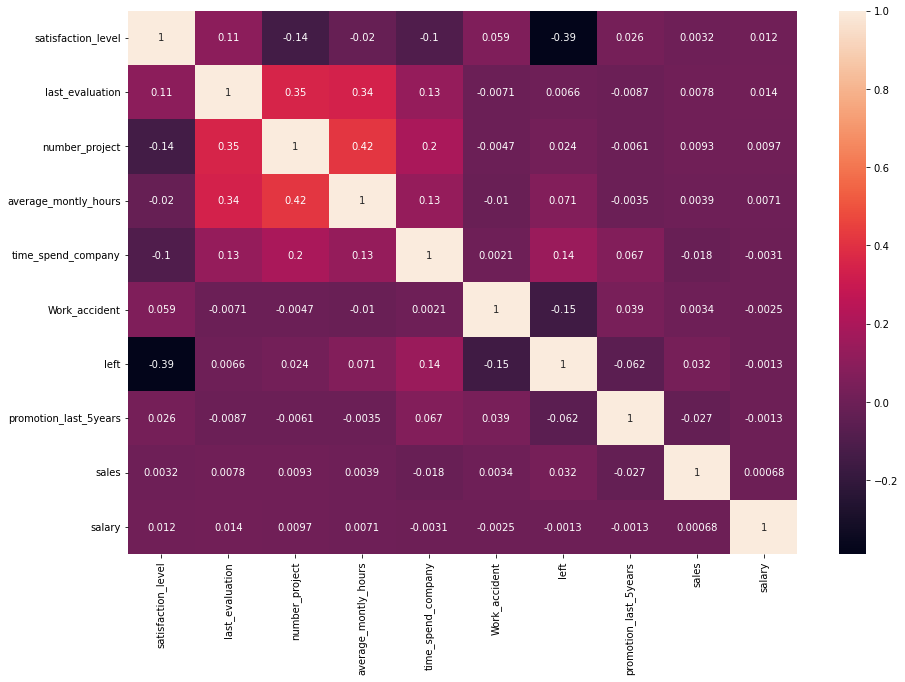

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [10]:
X = df.drop(columns=['satisfaction_level'])
X = pd.DataFrame(sklearn.preprocessing.StandardScaler().fit_transform(X), columns=X.columns)
y = df['satisfaction_level']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=666)

In [12]:
%%time
LIR = LinearRegression()
DTR = DecisionTreeRegressor()
RF = RandomForestRegressor(n_estimators = 100, random_state=555)
KNR = KNeighborsRegressor()
# XGB = XGBRegressor(n_estimators = 100, seed=666, eval_metric='logloss')
XGB = XGBRegressor()
reg_cv = GridSearchCV(XGB, {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2]
                            ,'max_depth': [3,4,6], 'n_estimators': [100,500,1000]}, verbose=1)
reg_cv.fit(X_train,y_train)
XGB = XGBRegressor(**reg_cv.best_params_)
clfs = []
print('\nBest Parameter: ', reg_cv.best_params_)
print('\n5-fold cross validation:\n')
for clf, label in zip([LIR, DTR, RF, KNR, XGB],
                      ['Linear Regression',
                       'Decision Tree Regressor',
                       'Random Forest',
                       'KNeighbors',
                       'XGBoost'
                      ]):
    scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring="r2")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train, y_train)
    clfs.append(md)
    print("Test Accuracy: %0.4f " % (clf.score(X_test, y_test)))

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best Parameter:  {'colsample_bytree': 1.0, 'max_depth': 6, 'min_child_weight': 1.2, 'n_estimators': 100}

5-fold cross validation:

Train CV Accuracy: 0.197 (+/- 0.013) [Linear Regression]
Test Accuracy: 0.1972 
Train CV Accuracy: 0.141 (+/- 0.036) [Decision Tree Regressor]
Test Accuracy: 0.1706 
Train CV Accuracy: 0.509 (+/- 0.014) [Random Forest]
Test Accuracy: 0.5414 
Train CV Accuracy: 0.378 (+/- 0.020) [KNeighbors]
Test Accuracy: 0.3939 
Train CV Accuracy: 0.478 (+/- 0.015) [XGBoost]
Test Accuracy: 0.4910 
CPU times: user 11min 50s, sys: 15.4 s, total: 12min 6s
Wall time: 3min 29s


In [13]:
pred = clf.predict(X_test)
pred

array([0.7516869 , 0.7417008 , 0.5358435 , ..., 0.8104345 , 0.8556143 ,
       0.69397897], dtype=float32)

In [16]:
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  0.175284


In [17]:
filename = 'Job_Satf.pkl'
outfile = open(filename,'wb')

In [18]:
pickle.dump(clf,outfile)
outfile.close()

In [19]:
pickled_model = pickle.load(open('Job_Satf.pkl', 'rb'))
pickled_model.predict(X_test)

array([0.7516869 , 0.7417008 , 0.5358435 , ..., 0.8104345 , 0.8556143 ,
       0.69397897], dtype=float32)